## Hello World Machine Learning
* https://www.youtube.com/watch?v=cKxRvEZd3Mw

features = [[140,1],[130,1],[150,1],[170,1]]  
labels = ['apple','apple','orange','orange']  


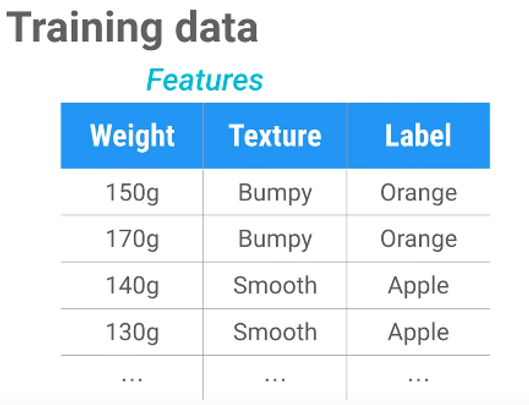

In [150]:
from sklearn import tree

features = [[140,1],[130,1],[150,1],[170,1]]
labels = [0,0,1,1]

clf = tree.DecisionTreeClassifier()
clf.fit(features,labels)
print clf.predict([150,0])

[1]


/usr/local/lib/python2.7/dist-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


## decision tree visualize
* need install some lib
* https://www.youtube.com/watch?v=tNa99PG8hR8

** for visualize :
** $sudo apt-get install python-pydot 

In [151]:
from sklearn.datasets import load_iris
iris = load_iris()
print iris.feature_names
print iris.target_names
print iris.data[0]
print iris.target[0]

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
[ 5.1  3.5  1.4  0.2]
0


In [152]:
import numpy as np
test_idx = [0,50,100]

#training data
train_target = np.delete(iris.target,test_idx)
train_data = np.delete(iris.data,test_idx,axis=0)

#testing data
test_target = iris.target[test_idx]
test_data = iris.data[test_idx]

clf = tree.DecisionTreeClassifier()
clf.fit(train_data,train_target)


print test_target
print clf.predict(test_data)

[0 1 2]
[0 1 2]


In [153]:
#visualize code
from sklearn.externals.six import StringIO
import pydot

dot_data = StringIO()
tree.export_graphviz(clf,
out_file=dot_data,
feature_names=iris.feature_names,
class_names=iris.target_names,
filled=True, rounded=True,
impurity=False)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_pdf("iris.pdf")

True

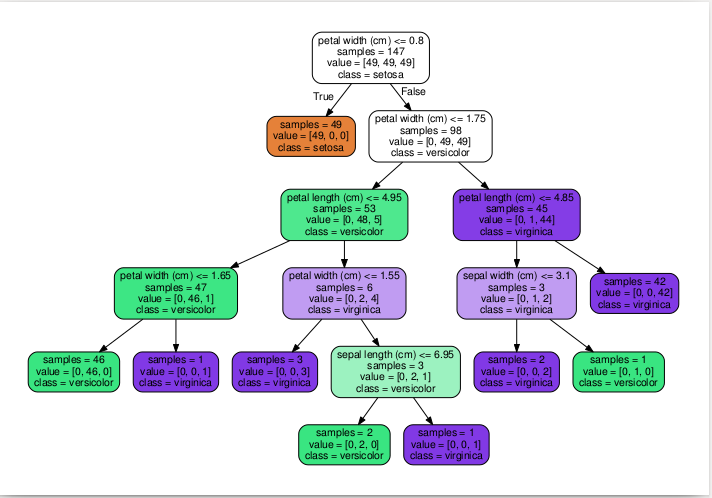

In [154]:
print test_data[0],test_target[0]
print iris.feature_names,iris.target_names

[ 5.1  3.5  1.4  0.2] 0
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] ['setosa' 'versicolor' 'virginica']


## What Makes a Good Feature ?
* sudo apt-get install python-matplotlib
* google refence : http://playground.tensorflow.org/

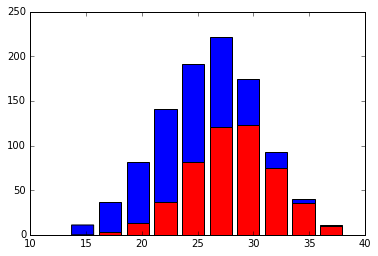

In [155]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

greyhounds = 500
labs = 500

grey_height = 28 + 4 * np.random.randn(greyhounds)
lab_height = 24 + 4 * np.random.randn(labs)

plt.hist([grey_height,lab_height],stacked=True,color=['r','b'])
plt.show()

### Let's Write a Pipeline

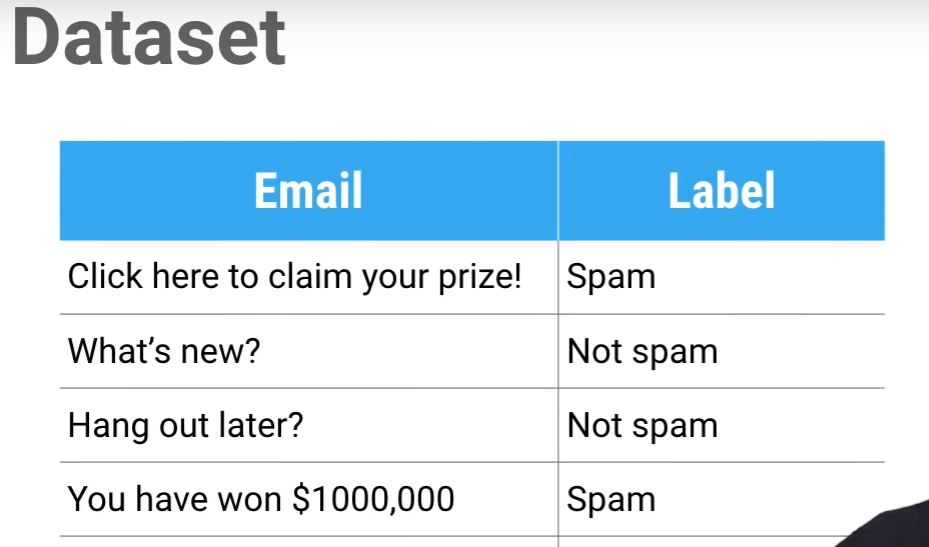

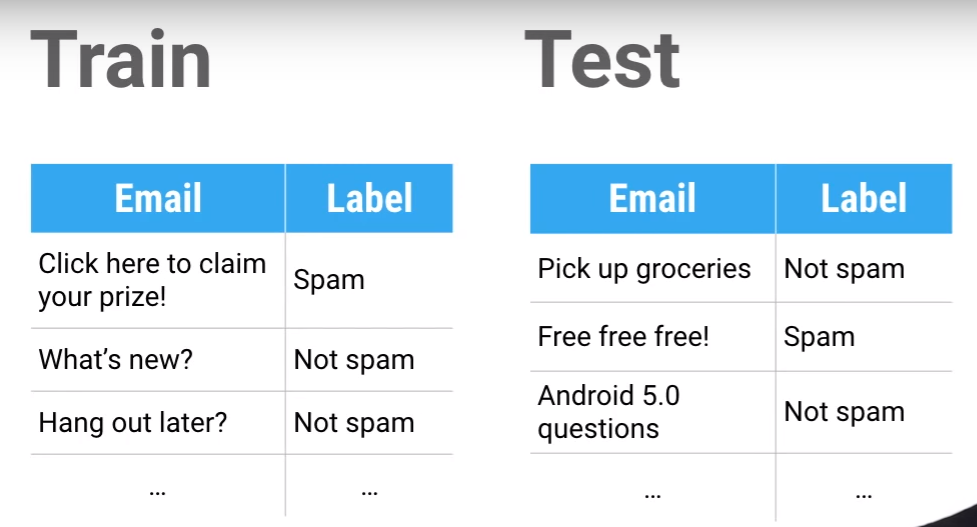

In [156]:
#import a dataset
from sklearn import datasets
iris = datasets.load_iris()

In [157]:
X_DataSet = iris.data
Y_DataSet = iris.target

In [158]:
# 將資料對半分為測試資料與訓練資料

from sklearn.cross_validation import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X_DataSet,Y_DataSet,test_size=0.5)

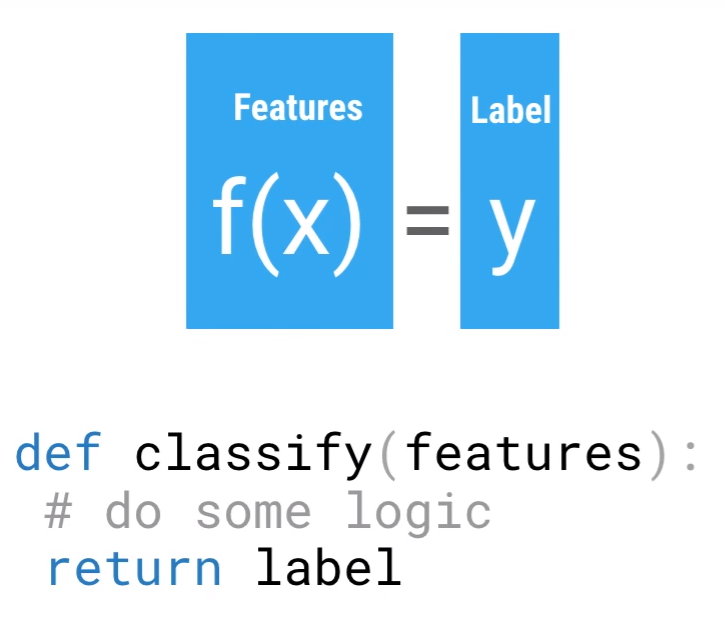

In [159]:
# classifiy 1
def classifiy_sample1():
    from sklearn import tree
    _classifier = tree.DecisionTreeClassifier()
    _classifier.fit(X_train,Y_train)
    return _classifier


In [160]:
# classifiy 2
def classifiy_sample2():
    from sklearn.neighbors import KNeighborsClassifier
    _classifier = KNeighborsClassifier()
    _classifier.fit(X_train,Y_train)
    return _classifier

In [161]:
_classifier = classifiy_sample2()

predictions = _classifier.predict(X_test)

from sklearn.metrics import accuracy_score
print accuracy_score(y_test,predictions)

0.346666666667


In [162]:
_classifier1 = classifiy_sample1()
_classifier2 = classifiy_sample2()

predictions1 = _classifier1.predict(X_test)
predictions2 = _classifier2.predict(X_test)

from sklearn.metrics import accuracy_score
print 'DecisionTreeClassifier ', accuracy_score(y_test,predictions1)
print 'KNeighborsClassifier ', accuracy_score(y_test,predictions2)

DecisionTreeClassifier  0.346666666667
KNeighborsClassifier  0.346666666667


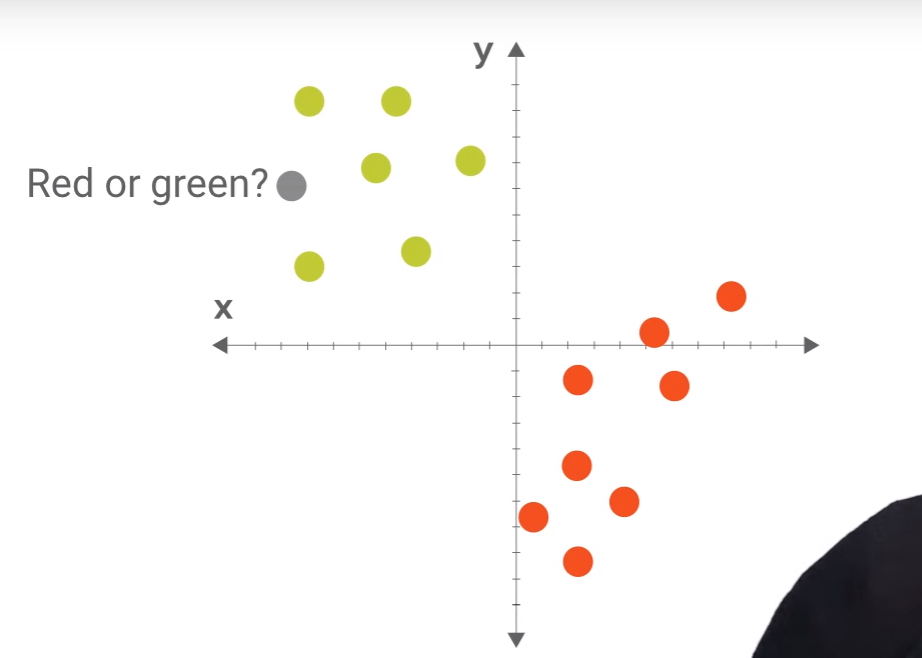


### Write Our First Classifier

In [1]:
#import a dataset
from sklearn import datasets
iris = datasets.load_iris()

X_DataSet = iris.data
Y_DataSet = iris.target

# 將資料對半分為測試資料與訓練資料
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_DataSet,Y_DataSet,test_size=0.5)

/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


#### fisrt make random classifier

In [176]:
import random

class ScrappyKNN_Random():
    def fit(self,X_train,y_train):
        self.X_train = X_train
        self.y_train = y_train
        pass
    
    def predict(self,X_test):
        predictions = []
        for row in X_test:
            label = random.choice(self.y_train)
            predictions.append(label)
        return predictions
        pass

In [178]:
from scipy.spatial import distance

def euc(a,b):
    return distance.euclidean(a,b)

class ScrappyKNN():
    def fit(self,X_train,y_train):
        self.X_train = X_train
        self.y_train = y_train
        
    def predict(self,X_test):
        predictions = []
        for row in X_test:
            label = random.choice(self.y_train)
            predictions.append(label)
        return predictions
        
    def closest(self,row):
        best_dist = euc(row,self.X_train[0])
        best_index = 0
        for i in range(1,len(self.X_train)):
            dist = euc(row,self.X_train[i])
            if dist < best_dist:
                best_dist = dist
                best_index = i
        return self.y_train[best_index]

In [179]:
_classifier1 = ScrappyKNN()
_classifier2 = ScrappyKNN_Random()

_classifier1.fit(X_train,y_train)
_classifier2.fit(X_train,y_train)

predictions1 = _classifier1.predict(X_test)
predictions2 = _classifier2.predict(X_test)

from sklearn.metrics import accuracy_score
print 'ScrappyKNN ', accuracy_score(y_test,predictions1)
print 'ScrappyKNN_Random ', accuracy_score(y_test,predictions2)

ScrappyKNN  0.306666666667
ScrappyKNN_Random  0.24


## KNN  

### Pros
* Relatively simple 

### Cons 
* Compuationally intensive
* Hard to represent relationships between features

# Train an Image Classifier with Tensorflow for Poets

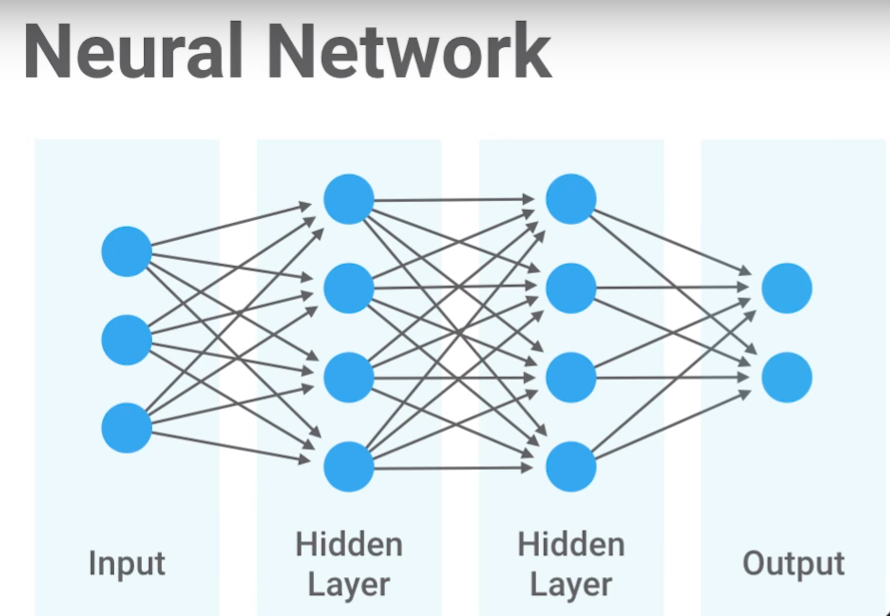

### TF Learn
* High level ML library on top of TensorFlow
* Similar to sckikit-learn

In [180]:
import tensorflow as tf

In [187]:
from sklearn import metrics,cross_validation
import tensorflow as tf
from tensorflow.contrib import learn

def main():
    #Load dataset.
    iris = learn.datasets.load_dataset('iris')
    x_train,_x_test,y_train,y_test = cross_validation.train_test_split(iris.data,iris.target,test_size=0.2,random_state=42)
    
    #build 3 layer DNN with 10,20,10 units respectively.
    classifier = learn.DNNClassifier(hidden_units=[10,20,10] ,n_classes=3)
    
    #Fit and predict
    classifier.fix(x_train,y_train,steps=200)
    score = metrics.accuracy_score(y_test,classifier.predict(x_test))
    print ('Accuracy : {0:f}'.format(score))
main()

TypeError: __init__() takes at least 3 arguments (3 given)

In [197]:
import tensorflow as tf, sys

# change this as you see fit
#image_path = sys.argv[1]
image_path = 'flower_photos'

# Read in the image_data
image_data = tf.gfile.FastGFile(image_path, 'rb').read()

# Loads label file, strips off carriage return
label_lines = [line.rstrip() for line 
                   in tf.gfile.GFile("tf_files/retrained_labels.txt")]

# Unpersists graph from file
with tf.gfile.FastGFile("tf_files/retrained_graph.pb", 'rb') as f:
    graph_def = tf.GraphDef()
    graph_def.ParseFromString(f.read())
    _ = tf.import_graph_def(graph_def, name='')

tf.initialize_all_variables()
with tf.Session() as sess:
    # Feed the image_data as input to the graph and get first prediction
    softmax_tensor = sess.graph.get_tensor_by_name('final_result:0')
    
    predictions = sess.run(softmax_tensor, \
             {'DecodeJpeg/contents:0': image_data})
    
    # Sort to show labels of first prediction in order of confidence
    top_k = predictions[0].argsort()[-len(predictions[0]):][::-1]
    
    for node_id in top_k:
        human_string = label_lines[node_id]
        score = predictions[0][node_id]
        print('%s (score = %.5f)' % (human_string, score))

FailedPreconditionError: flower_photos